# 19 • Análisis de texto

En este notebook se revisará distintas formas de realizar análisis de texto (básico) con Python.

## Contenido
1. N-grams
2. Sentiment analysis
3. Wordcloud
4. Referencias  

In [8]:
# load libraries
## basic libraries
import pandas as pd
import numpy as np

# Para visualización usaré Altair
import altair as alt
# alt.renderers.enable('mimetype') #<-Este nos sirve para ver las gráficas en GitHub
alt.renderers.enable('default')

RendererRegistry.enable('default')

In [9]:
# Para eliminar stopwords
import nltk

# Para n-grams
import itertools
from collections import Counter

# Read txt file
import requests

In [10]:
## librería spaCy
import spacy
nlp = spacy.load("es_core_news_sm")

## 1. N-grams

In [11]:
# funcion para generar los n-grams
def n_gram(tokens,n):
    return[tokens[i:i+n] for i in range(len(tokens)-n+1)]

### Ejemplo con *bigrams* de caracteres

In [12]:
texto_1 = 'Me llegó un email al correo leo234@gmail.com que dice: "OMG! El señor Carlos rompió el control del televisor hoy y tuve que \
comprar otro en www.amazon.com.mx".'

In [13]:
# obtener el n-grams de tamaño 2
ejem_1 = Counter(zip(texto_1, itertools.islice(texto_1, 1, None)))

# hacer un dataframe para poder graficarlo
my_cols = [str(i) for i in ejem_1.keys()]
source = pd.DataFrame(ejem_1.values(), index=ejem_1.keys()).reset_index().rename(columns={"level_0":"chr_1", "level_1":"chr_2", 0:"frecuencia"})
source["bigram"] = source["chr_1"] + source["chr_2"]
source#.head(10)

,chr_1,chr_2,frecuencia,bigram
0,M,e,1,Me
1,e,,4,e
2,,l,2,l
3,l,l,1,ll
4,l,e,3,le
...,...,...,...,...
103,m,.,1,m.
104,.,m,1,.m
105,m,x,1,mx
106,x,"""",1,"x"""


In [14]:
# plot
alt.Chart(source).mark_bar().encode(
    alt.X("bigram",sort="-y"),
    y="frecuencia",
    tooltip=["bigram","chr_1","chr_2","frecuencia"]
).properties(
    title="Frecuencia de char-bigrams (con más de 1 repetición)"
)

alt.Chart(...)

### Ejemplo con *bigrams* de tokens (palabras o cadenas de caracteres)

In [18]:
# Mini-preproceso

## función para eliminar stopwords
def remove_stopwords(text):
    stopwords = nltk.corpus.stopwords.words('spanish')
    output= [i for i in text if i not in stopwords]
    return output

## función de preproceso sencillo
def preproceso(texto):
    ## En minúsculas
    texto = texto.lower()
    ## Tokenization
    tokens = texto.rsplit()
    ## Eliminar Stopwords
    #tokens = remove_stopwords(tokens)
    return tokens

In [25]:
# Canción "Despacito" de Luis Fonsi, link: https://www.letras.com/luis-fonsi/despacito/
text_2 = '''
¡Ay! 
Fonsi 
DY 
Oh-oh 
Oh no, oh no 
Oh, eh-yeh (Daddy) 
Go! 
Sí, sabes que ya llevo un rato mirándote 
Tengo que bailar contigo hoy (DY) 
Vi que tu mirada ya estaba llamándome 
Muéstrame el camino, que yo voy (oh) 
Tú 
Tú eres el imán y yo soy el metal 
Me voy acercando y voy armando el plan 
Solo con pensarlo se acelera el pulso (oh, yeah) 
Ya 
Ya me está gustando más de lo normal 
Todos mis sentidos van pidiendo más 
Esto hay que tomarlo sin ningún apuro 
Despacito 
Quiero respirar tu cuello, despacito 
Deja que te diga cosas al oído 
Para que te acuerdes si no estás conmigo 
Despacito 
Quiero desnudarte a besos, despacito 
Firmar las paredes de tu laberinto 
Y hacer de tu cuerpo todo un manuscrito 
(¡Sube, sube, sube!) 
(¡Sube, sube!) 
Quiero ver bailar tu pelo 
Quiero ser tu ritmo (uoh-uoh) 
Que le enseñes a mi boca (uoh-uoh) 
Tus lugares favoritos (favoritos, favoritos, baby) 
Déjame sobrepasar 
Tus zonas de peligro (uoh-uoh) 
Hasta provocar tus gritos (uoh-uoh) 
Y que olvides tu apellido (Daddy, DY) 
Si te pido un beso, ven, dámelo 
Yo sé que estás pensándolo 
Llevo tiempo intentándolo 
Mami, esto es dando y dándolo 
Sabes que tu corazón conmigo 
Te hace bam-bam 
Sabes que esa beba está buscando 
De mi bam-bam 
Ven, prueba de mi boca para ver cómo te sabe 
Quiero, quiero, quiero ver cuánto amor a ti te cabe 
Yo no tengo prisa, yo me quiero dar el viaje 
Empezamos lento, después salvaje 
Pasito a pasito, suave, suavecito 
Nos vamos pegando, poquito a poquito 
Cuando tú me besas con esa destreza 
Veo que eres malicia con delicadeza 
Pasito a pasito, suave, suavecito 
Nos vamos pegando, poquito a poquito 
Y es que esa belleza es un rompecabezas 
Pero, pa' montarlo, aquí tengo la pieza (oh, yeh) 
Despacito 
Quiero respirar tu cuello, despacito 
Deja que te diga cosas al oído 
Para que te acuerdes si no estás conmigo 
Despacito 
Quiero desnudarte a besos, despacito 
Firmar las paredes de tu laberinto 
Y hacer de tu cuerpo todo un manuscrito 
(¡Sube, sube, sube!) 
(¡Sube, sube!) 
Quiero ver bailar tu pelo 
Quiero ser tu ritmo (uoh-uoh) 
Que le enseñes a mi boca (uoh-uoh) 
Tus lugares favoritos (favoritos, favoritos, baby) 
Déjame sobrepasar 
Tus zonas de peligro (uoh-uoh) 
Hasta provocar tus gritos (uoh-uoh) 
Y que olvides tu apellido 
Despacito 
Vamos a hacerlo en una playa en Puerto Rico 
Hasta que las olas griten: ¡Ay, bendito! 
Para que mi sello se quede contigo (¡báilalo!) 
Pasito a pasito, suave, suavecito 
Nos vamos pegando, poquito a poquito 
Que le enseñes a mi boca (uoh-uoh) 
Tus lugares favoritos (favoritos, favoritos, baby) 
Pasito a pasito, suave, suavecito 
Nos vamos pegando, poquito a poquito 
Hasta provocar tus gritos (Fonsi) 
Y que olvides tu apellido (DY) 
Despacito 
'''

In [26]:
# aplicar función 'n_gram' al ejemplo 1
tokens_2 = preproceso(text_2)
my_bigrams = n_gram(tokens_2,2)  #<--Bigrams
print("\nLos primeros 10 bigrams:")
my_bigrams[:10]


Los primeros 10 bigrams:


[['¡ay!', 'fonsi'],
 ['fonsi', 'dy'],
 ['dy', 'oh-oh'],
 ['oh-oh', 'oh'],
 ['oh', 'no,'],
 ['no,', 'oh'],
 ['oh', 'no'],
 ['no', 'oh,'],
 ['oh,', 'eh-yeh'],
 ['eh-yeh', '(daddy)']]

In [27]:
# frecuencia de token's bigrams
# df_tokens = pd.DataFrame(Counter(zip(pd.DataFrame(my_bigrams)[0], pd.DataFrame(my_bigrams)[1])))
bigram_freq = Counter(zip(pd.DataFrame(my_bigrams)[0], pd.DataFrame(my_bigrams)[1]))

# hacer un dataframe para poder graficarlo
# my_cols = [str(i) for i in bigram_freq.keys()]
# bigram_freq.values()
source = pd.DataFrame(bigram_freq.values(), index=bigram_freq.keys()).reset_index().rename(columns={"level_0":"token_1", "level_1":"token_2", 0:"frecuencia"})
source["bigram"] = source["token_1"] + " " + source["token_2"]
source


,token_1,token_2,frecuencia,bigram
0,¡ay!,fonsi,1,¡ay! fonsi
1,fonsi,dy,1,fonsi dy
2,dy,oh-oh,1,dy oh-oh
3,oh-oh,oh,1,oh-oh oh
4,oh,"no,",1,"oh no,"
...,...,...,...,...
308,poquito,hasta,1,poquito hasta
309,gritos,(fonsi),1,gritos (fonsi)
310,(fonsi),y,1,(fonsi) y
311,apellido,(dy),1,apellido (dy)


In [28]:
source.sort_values(by="frecuencia", ascending=False).head(15)

,token_1,token_2,frecuencia,bigram
146,mi,boca,4,mi boca
249,a,poquito,4,a poquito
243,"suave,",suavecito,4,"suave, suavecito"
242,"pasito,","suave,",4,"pasito, suave,"
241,a,"pasito,",4,"a pasito,"
240,pasito,a,4,pasito a
245,nos,vamos,4,nos vamos
246,vamos,"pegando,",4,"vamos pegando,"
247,"pegando,",poquito,4,"pegando, poquito"
248,poquito,a,4,poquito a


In [29]:
# plot
alt.Chart(source[source.frecuencia>2]).mark_bar().encode(
    alt.X("bigram",sort="-y"),
    y="frecuencia",
    tooltip=["bigram","token_1","token_2","frecuencia"]
).properties(
    title="Frecuencia de token-bigrams (con más de 2 repeticiones)"
)

alt.Chart(...)

### Bigram plot
Hacer esta gráfica no es tan sencilla, y recomiendo hacerlo mejor en R para quienes lo sepan. Pero si están interesados, pueden revisar los pasos para hacerla usando las siguientes ligas:
- Earth Lab. [Lesson 6. Use Twitter Data to Explore the 2013 Colorado Flood Using Open Source Python](https://www.earthdatascience.org/courses/use-data-open-source-python/intro-to-apis/json-colorado-flood-twitter-data/).
- NLTK. [Sample usage for collocations](https://www.nltk.org/howto/collocations.html).


In [30]:
# load libraries for bigram plot
import string
import nltk
from nltk.collocations import *
import networkx
import networkx as nx
import matplotlib.pyplot as plt

In [31]:
# Preproceso del texto

## Eliminar signos de puntuación
signos_puntuacion = string.punctuation
#### función para eliminar signos de puntuación
def remove_punctuation(text, signos=signos_puntuacion):
    punctuationfree="".join([i for i in text if i not in signos])
    return punctuationfree

## Texto preprocesado: eliminar puntuación y salto de renglón, 
##        y texto en minúsculas
texto_preprocess = remove_punctuation(text_2).replace("\n", " ").lower()

## Obtener tokens
tokens = nltk.wordpunct_tokenize(texto_preprocess)

## Eliminar stopwords
stopwords = nltk.corpus.stopwords.words('spanish')
### función para eliminar stopwords
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output
# eliminar stopwrods de tokens
tokens_clean = remove_stopwords(tokens)

In [32]:
# bigrams
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(tokens_clean)
scored = finder.score_ngrams(bigram_measures.raw_freq)

In [33]:
# Create a network plot of grouped terms
# Para esto se usa una gráfica de grafos en este caso
bigram_df = pd.DataFrame(scored,
                             columns=['bigram', 'count'])
bigram_df_head = bigram_df.sort_values(by="count", ascending=False).head(25)

# Create dictionary of bigrams and their counts
d = bigram_df_head.set_index('bigram').T.to_dict('records')

# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

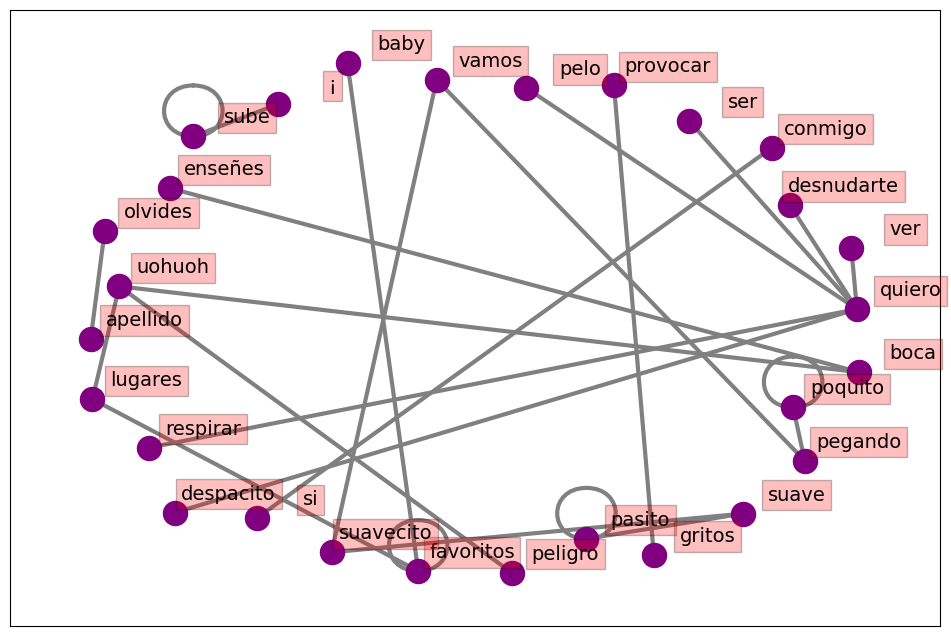

In [34]:
fig, ax = plt.subplots(figsize=(12, 8))

pos = nx.spring_layout(G, k=5.5)
# Plot networks
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=3,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.05
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=14)
    
plt.show()

## 2. Sentiment analysis
Herramienta para identificar si un texto es positivo o negativo.

In [37]:
from spacytextblob.spacytextblob import SpacyTextBlob

### 2.1. Token's sentiment analysis

In [38]:
# get text in English
nlp = spacy.load("en_core_web_sm")
#target_url = "https://raw.githubusercontent.com/formcept/whiteboard/master/nbviewer/notebooks/data/harrypotter/Book%201%20-%20The%20Philosopher's%20Stone.txt"  # <- ubicación inicial de texto
target_url = "https://raw.githubusercontent.com/amephraim/nlp/master/texts/J.%20K.%20Rowling%20-%20Harry%20Potter%201%20-%20Sorcerer's%20Stone.txt"
text_3 = requests.get(target_url).text

In [39]:
# Primeros 500 caracteres del libro de Harry Potter
text_3[:500]

"Harry Potter and the Sorcerer's Stone\n\n\nCHAPTER ONE\n\nTHE BOY WHO LIVED\n\nMr. and Mrs. Dursley, of number four, Privet Drive, were proud to say\nthat they were perfectly normal, thank you very much. They were the last\npeople you'd expect to be involved in anything strange or mysterious,\nbecause they just didn't hold with such nonsense.\n\nMr. Dursley was the director of a firm called Grunnings, which made\ndrills. He was a big, beefy man with hardly any neck, although he did\nhave a very large mustache"

In [40]:
# add the sentiment
nlp.add_pipe("spacytextblob")
doc = nlp(text_3[:9_993])  #the first more-less 10_000 characters

In [41]:
# put it in a dataframe
df = pd.DataFrame()

for token in doc:
    df_1 = pd.DataFrame({
        "token":token.text, "tag":token.pos_,
        "polarity":token._.blob.polarity,
        "subjectivity":token._.blob.subjectivity
    }, index=[0])
    df = pd.concat([df, df_1])#.reset_index(drop=True)

In [42]:
# print the table for polarity and subjectivity values different to zero
df_2 = df[(df.subjectivity != 0) | (df.polarity != 0)].reset_index(drop=True)
df_2

,token,tag,polarity,subjectivity
0,proud,ADJ,0.800,1.00
1,perfectly,ADV,1.000,1.00
2,normal,ADJ,0.150,0.65
3,very,ADV,0.200,0.30
4,much,ADV,0.200,0.20
...,...,...,...,...
136,angry,ADJ,-0.500,1.00
137,normally,ADV,0.150,0.65
138,sharply,ADV,-0.125,0.75
139,Funny,ADJ,0.250,1.00


In [43]:
# plot
alt.Chart(df).mark_bar().encode(
    alt.X('polarity', bin=True, title="Sentiment polarity"),
    alt.Y('count()', scale=alt.Scale(type="log"), title="Frequency"),
    tooltip=['polarity', 'count()']
).properties(
    title="Histogram of token's sentiment"
)
# Sentiment score is a float within the range
#    -1.0 (negative) to 1.0 (positive).

alt.Chart(...)

In [44]:
# plot
alt.Chart(df).mark_circle(opacity=.4, size=50).encode(
    alt.X('subjectivity', title="Subjectivity"),
    alt.Y('polarity', title="Polarity"),
    alt.Color('tag'),
    tooltip=['token','polarity','subjectivity']
).properties(
    title="Scatter plot of Polarity vs. Subjectivity by token"
)
# Polarity score are a float within the range -1.0 (negative) to 
# 1.0 (positive), and subjectivity from 0.0 to 1.0

alt.Chart(...)

### 2.2. Sentence / paragraph sentiment analysis

In [45]:
# get text in English
nlp = spacy.load("en_core_web_sm")

# add the sentiment
nlp.add_pipe("spacytextblob")

In [46]:
paragraphs = [i.replace("\n"," ") for i in text_3.rsplit(".\n")]

In [47]:
# put it in a table
df_sent = pd.DataFrame()

for i in paragraphs:
    # get text in English
    # nlp = spacy.load("en_core_web_sm")

    # add the sentiment
    # nlp.add_pipe("spacytextblob")
    doc = nlp(i)  #the first more-less 10_000 characters
    df_1 = pd.DataFrame({
        "paragraph":doc.text,
        "polarity":doc._.blob.polarity,
        "subjectivity":doc._.blob.subjectivity
    }, index=[0])
    df_sent = pd.concat([df_sent, df_1])

In [48]:
# print the table for polarity and subjectivity values different to zero
df_sent[(df_sent.subjectivity != 0) | (df_sent.polarity != 0)].reset_index(drop=True)

,paragraph,polarity,subjectivity
0,Harry Potter and the Sorcerer's Stone CHAPTE...,0.165714,0.518095
1,Mr. Dursley was the director of a firm called...,-0.024853,0.361447
2,"The Dursleys had everything they wanted, but ...",0.300000,0.850000
3,"Potter was Mrs. Dursley's sister, but they had...",0.112500,0.500000
4,When Mr. and Mrs. Dursley woke up on the dull...,0.014792,0.592500
...,...,...,...
1461,"""Very,"" said Harry. ""Thanks for the fudge and...",0.200000,0.250000
1462,"Weasley."" ""Oh, it was nothing, dear."" ""Ready...",0.020000,0.510000
1463,Harry hung back for a last word with Ron and ...,0.000000,0.033333
1464,"""See you over the summer, then."" ""Hope you h...",-0.216667,0.783333


In [49]:
# plot
alt.Chart(df_sent).mark_circle(opacity=.4, size=50).encode(
    alt.X('subjectivity:Q', title="Subjectivity"),
    alt.Y('polarity:Q', title="Polarity"),
    tooltip=['paragraph','polarity','subjectivity']
).properties(
    title="Scatter plot of Polarity vs. Subjectivity by Paragraph"
)
# Polarity score are a float within the range -1.0 (negative) to 
# 1.0 (positive), and subjectivity from 0.0 to 1.0

alt.Chart(...)

## 3. Wordcloud
Esta es una herramienta visual con la que se observa qué tanto se repite una palabra de acuerdo al tamaño que tiene en la *wordcloud*.

### 3.1. Sin *mask* de *background*

In [50]:
# load libraries for WordCloud
from textblob import TextBlob
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator

In [51]:
## data
# para data usamos la canción de Tutu text_2
# o podemos usar el libro de harry potter  text_3

# get wordcloud
wcloud = WordCloud(width=3000, height=1700, random_state=11, max_font_size=211, 
                   background_color='white', max_words=400, collocations=False, 
                   mode='RGBA').generate(text_3)

(-0.5, 2999.5, 1699.5, -0.5)

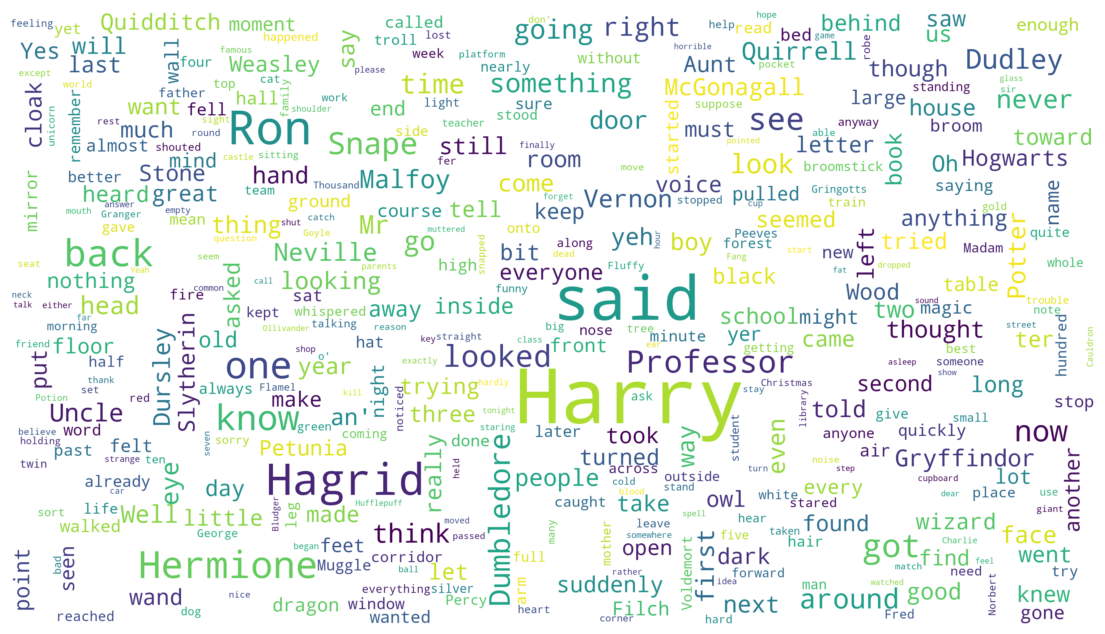

In [52]:
# plot
plt.figure(figsize=(14,8))

# create coloring from image
plt.imshow(wcloud.recolor(), interpolation="bilinear")
plt.axis("off")

# # store to file
# plt.savefig("img/19-02_wordcloud_orig.jpg", format="jpg")

### 3.2. Con *mask* de *background*

In [53]:
## data and mask
# para data usamos la canción de Tutu texto_2,
# o podemos usar el libro de harry potter  text_3
mask = np.array(Image.open('img/19-01_uk_flag.png'))  # 'img/02-01_webpage.png'

# get wordcloud
wcloud = WordCloud(width=3000, height=1700, random_state=11, max_font_size=211, 
                   background_color='black', max_words=400, collocations=False, 
                   mode='RGBA',mask=mask).generate(text_3)

(-0.5, 3277.5, 1633.5, -0.5)

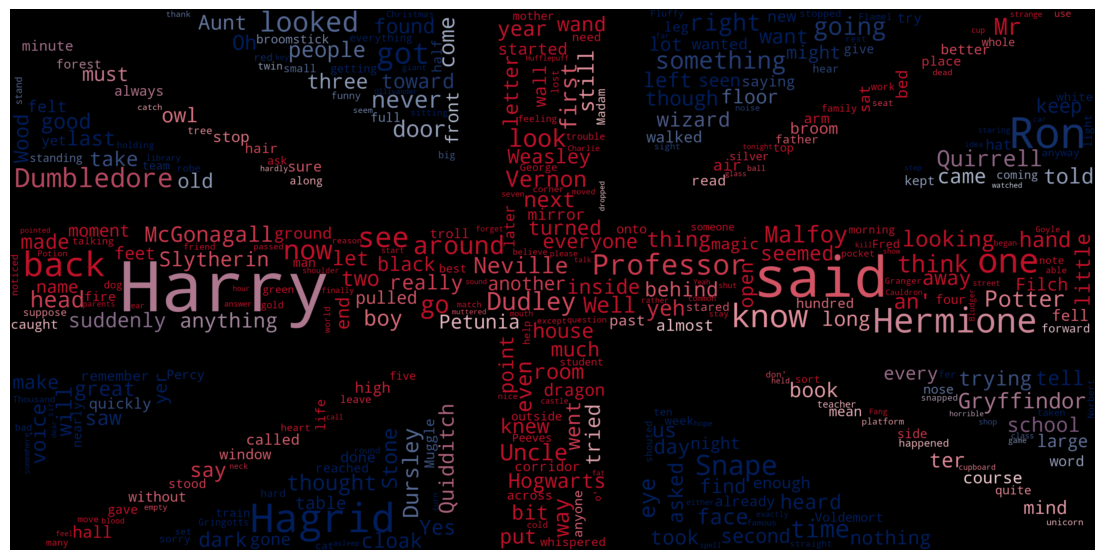

In [54]:
# plot
plt.figure(figsize=(14,8))

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.imshow(wcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# # store to file
# plt.savefig("img/19-03_wordcloud_mask.jpg", format="jpg")

## 4. Referencias
- spaCy's [textblob](https://spacy.io/universe/project/spacy-textblob)
- [SpaCy For Traditional NLP](https://chatbotslife.com/spacy-for-traditional-nlp-c85b5436b21c) por saketh-saraswathi en *Chatbots Life*.
- Earth Lab. [Lesson 6. Use Twitter Data to Explore the 2013 Colorado Flood Using Open Source Python](https://www.earthdatascience.org/courses/use-data-open-source-python/intro-to-apis/json-colorado-flood-twitter-data/).
- NLTK. [Sample usage for collocations](https://www.nltk.org/howto/collocations.html).